In [1]:

import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
real_users=pd.read_csv(r'data\users.csv')

In [3]:
fake_users=pd.read_csv(r'data\fusers.csv')

In [4]:
real_users['user_type']=[1 for i in range(real_users.shape[0])]

In [5]:
real_users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,user_type
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13,1
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13,1
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13,1
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13,1
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13,1


In [6]:
real_users.isnull().sum()

id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   1018
lang                                     0
time_zone                              418
location                               492
default_profile                       1084
default_profile_image                 1477
geo_enabled                            762
profile_image_url                        0
profile_banner_url                     496
profile_use_background_image            58
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

In [7]:
real_users.fillna('',inplace=True)

In [8]:
real_users.isnull().sum()

id                                    0
name                                  0
screen_name                           0
statuses_count                        0
followers_count                       0
friends_count                         0
favourites_count                      0
listed_count                          0
created_at                            0
url                                   0
lang                                  0
time_zone                             0
location                              0
default_profile                       0
default_profile_image                 0
geo_enabled                           0
profile_image_url                     0
profile_banner_url                    0
profile_use_background_image          0
profile_background_image_url_https    0
profile_text_color                    0
profile_image_url_https               0
profile_sidebar_border_color          0
profile_background_tile               0
profile_sidebar_fill_color            0


In [9]:
fake_users['user_type']=[0 for i in range(fake_users.shape[0])]

In [10]:
fake_users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,user_type
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,...,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT,0
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2015-02-14 10:40:01,INT,0
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,...,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-39600.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT,0
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,...,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT,0
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,19800.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT,0


In [11]:
fake_users.fillna('',inplace=True)

In [12]:
users=pd.concat([real_users,fake_users],axis=0)

In [13]:
Users=sklearn.utils.shuffle(users)

In [14]:
Users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,user_type
419,199147059,Francesco Calaprice,Kekkodux,30,9,37,0,0,Wed Oct 06 04:18:21 +0000 2010,,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,,,,esperto in informatica e prodotti di hi-tech.,2015-02-14 10:54:49,E13,1
193,76286424,Namaste,jole_bee,6212,369,198,103,5,Tue Sep 22 08:48:06 +0000 2009,,...,http://a0.twimg.com/profile_background_images/...,E1E6E8,B30048,3600,,,"Non so quello che dico,ma lo dico veramente be...",2015-02-14 10:54:49,E13,1
388,616306719,Mica Spence,micaspencecghbb,53,15,578,0,0,Sat Jun 23 15:54:54 +0000 2012,,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,,,,"i like gettin money,girls,soppin and hoopin ll...",2015-02-14 10:40:01,INT,0
150,57365720,,acimoto,6351,98,75,127,4,Thu Jul 16 15:48:10 +0000 2009,http://byoblu.com,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600,,,N.1,2015-02-14 10:54:49,E13,1
941,618262473,Willette Hayes,willettehay,30,16,273,0,0,Mon Jun 25 15:24:56 +0000 2012,,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,,,,"I love t Act, Sing and Dance",2015-02-14 10:40:01,INT,0


In [15]:
Users_text=Users.copy(deep=True)

In [16]:
cols=Users.columns

In [17]:
cols

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'user_type'],
      dtype='object')

In [18]:
X=Users.drop(['time_zone','profile_use_background_image','dataset','profile_sidebar_border_color',
             'profile_background_image_url_https','profile_background_color','profile_link_color','default_profile_image',
             'time_zone','url'],axis=1)

In [19]:
Y=Users['user_type']

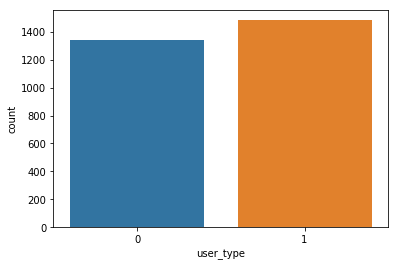

In [20]:
sns.countplot(Y)

In [21]:
enc=LabelEncoder()
Users1=Users
for cols in Users.columns:
    if(isinstance(Users[cols].values[0],str)):
        try:
            Users1[cols]=enc.fit_transform(Users[cols].values)
        except:
            Users1[cols]=np.zeros(Users[cols].values.shape[0])

In [22]:
Users1.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,user_type
419,199147059,893,458,30,9,37,0,0,2738,0,...,0,166,12,0.0,0,0,2138,1,0,1
193,76286424,1835,1822,6212,369,198,103,5,2507,0,...,57,205,254,0.0,0,0,1392,1,0,1
388,616306719,1753,2182,53,15,578,0,0,1136,0,...,0,166,12,0.0,0,0,2227,0,1,0
150,57365720,2810,914,6351,98,75,127,4,2062,26,...,0,166,12,0.0,0,0,1326,1,0,1
941,618262473,2480,2770,30,16,273,0,0,565,0,...,0,166,12,0.0,0,0,889,0,1,0


In [23]:
X1=Users1.drop(['id','time_zone','profile_use_background_image','dataset','profile_sidebar_border_color',
             'profile_background_image_url_https','profile_background_color','profile_link_color','default_profile_image',
             'time_zone','url','utc_offset','profile_background_tile','default_profile','geo_enabled'],axis=1)

In [24]:
for cols in X1.columns:
        for v in X1[cols].values:
            if(isinstance(v,str)):
                print(cols)
                break

In [25]:
X1.iloc[0,:]

name                             893
screen_name                      458
statuses_count                    30
followers_count                    9
friends_count                     37
favourites_count                   0
listed_count                       0
created_at                      2738
lang                               5
location                          24
profile_image_url                 24
profile_banner_url                 0
profile_text_color                48
profile_image_url_https           24
profile_sidebar_fill_color       108
profile_background_image_url       0
protected                          0
verified                           0
description                     2138
updated                            1
user_type                          1
Name: 419, dtype: int64

In [26]:
Y1=Users1['user_type']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,stratify=Y1,test_size=0.3,random_state=43)

In [28]:
x_train.shape

(1972, 21)

In [29]:
x_test.shape

(846, 21)

In [30]:
clf=SVC(kernel='linear')

In [31]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
acc_svm=clf.score(x_test,y_test)

In [33]:
cm1=confusion_matrix(clf.predict(x_test),y_test)

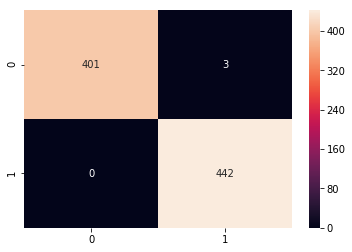

In [34]:
sns.heatmap(cm1,annot=True,fmt='d')

In [35]:
clf2=GaussianNB()


In [36]:
clf2.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
acc_NB=clf2.score(x_test,y_test)

In [38]:
cm2=confusion_matrix(clf2.predict(x_test),y_test)

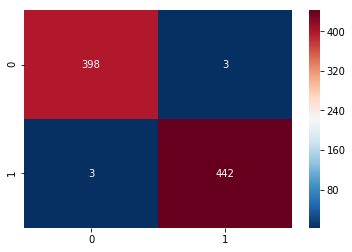

In [39]:
sns.heatmap(cm2,annot=True,fmt="d",cmap='RdBu_r')

In [40]:
clf3=RandomForestClassifier(n_estimators=200)

In [41]:
clf3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
acc_RF=clf3.score(x_test,y_test)

In [43]:
cm3=confusion_matrix(clf3.predict(x_test),y_test)

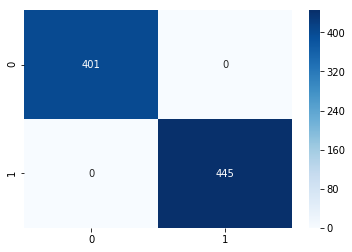

In [44]:
sns.heatmap(cm3,annot=True,fmt="d",cmap='Blues')

In [45]:
acc_list=[acc_svm,acc_NB,acc_RF]

In [46]:
algo=['SVM','NB','RF']

In [47]:
acc_svm

0.9964539007092199

In [48]:
acc_NB

0.9929078014184397

In [49]:
acc_RF

1.0

<BarContainer object of 3 artists>

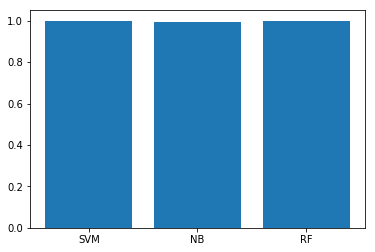

In [50]:
plt.bar(algo,acc_list)

<BarContainer object of 1 artists>

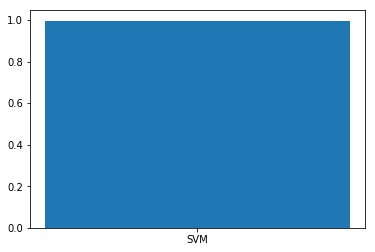

In [51]:
Users2=Users_text
for cols in Users_text.columns:
    if(isinstance(Users_text[cols].values[0],str)):
        pass
    else:
        Users_text=Users_text.drop(cols,axis=1)   

In [52]:
Users_text.head()

,name,screen_name,created_at,url,lang,time_zone,location,default_profile_image,profile_image_url,profile_banner_url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
419,Francesco Calaprice,Kekkodux,Wed Oct 06 04:18:21 +0000 2010,,it,,"41.001606,16.876919",,http://a0.twimg.com/profile_images/1252186265/...,,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,,,,esperto in informatica e prodotti di hi-tech.,2015-02-14 10:54:49,E13
193,Namaste,jole_bee,Tue Sep 22 08:48:06 +0000 2009,,it,Rome,,,http://a0.twimg.com/profile_images/3322798528/...,https://si0.twimg.com/profile_banners/76286424...,...,EDD5EC,http://a0.twimg.com/profile_background_images/...,E1E6E8,B30048,3600,,,"Non so quello che dico,ma lo dico veramente be...",2015-02-14 10:54:49,E13
388,Mica Spence,micaspencecghbb,Sat Jun 23 15:54:54 +0000 2012,,en,,Never Hard To Find .,,http://a0.twimg.com/profile_images/3292574515/...,,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,,,,"i like gettin money,girls,soppin and hoopin ll...",2015-02-14 10:40:01,INT
150,,acimoto,Thu Jul 16 15:48:10 +0000 2009,http://byoblu.com,it,Rome,"Genova, Italian Sultanate",,http://a0.twimg.com/profile_images/2650702872/...,https://si0.twimg.com/profile_banners/57365720...,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600,,,N.1,2015-02-14 10:54:49,E13
941,Willette Hayes,willettehay,Mon Jun 25 15:24:56 +0000 2012,,en,,"Springtown, Texas",,http://a0.twimg.com/profile_images/2961990422/...,,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,,,,"I love t Act, Sing and Dance",2015-02-14 10:40:01,INT


In [53]:
Users_text.isnull().sum()

name                                  0
screen_name                           0
created_at                            0
url                                   0
lang                                  0
time_zone                             0
location                              0
default_profile_image                 0
profile_image_url                     0
profile_banner_url                    0
profile_background_image_url_https    0
profile_text_color                    0
profile_image_url_https               0
profile_sidebar_border_color          0
profile_background_tile               0
profile_sidebar_fill_color            0
profile_background_image_url          0
profile_background_color              0
profile_link_color                    0
utc_offset                            0
protected                             0
verified                              0
description                           0
updated                               0
dataset                               0


In [54]:
x=Users_text['description']

In [55]:
x

419         esperto in informatica e prodotti di hi-tech.
193     Non so quello che dico,ma lo dico veramente be...
388     i like gettin money,girls,soppin and hoopin ll...
150                                                   N.1
941                          I love t Act, Sing and Dance
                              ...                        
184                           Amante di Cinema e Serie TV
1185    Dear Isis (eye-si) is the hottest, new site wh...
782                                                      
1350         Prof precaria, studio cinema e letteratura. 
1244    Social edia and marketing - I follow evryone w...
Name: description, Length: 2818, dtype: object

In [56]:
y=Users1['user_type']

In [57]:
tfidf=TfidfVectorizer(sublinear_tf=True,min_df=2,ngram_range=(1,2),stop_words='english')

In [58]:
features=tfidf.fit_transform(x).toarray()

In [59]:
features.shape

(2818, 3806)

In [60]:
y.shape

(2818,)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(features,y,stratify=y,test_size=0.3,random_state=43)

In [62]:
clf=RandomForestClassifier(n_estimators=200)

In [63]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
clf.score(x_test,y_test)

0.8085106382978723

In [65]:
error_rate=[]
for i in range(50,300,20):
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(x_train,y_train)
    pred_i=clf.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

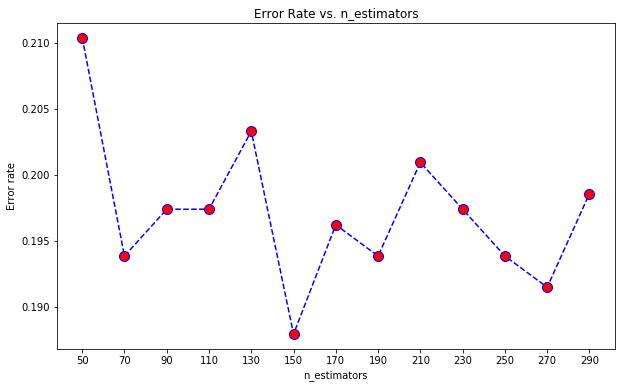

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(50,300,20),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title('Error Rate vs. n_estimators')
plt.xticks(range(50,300,20))
plt.xlabel("n_estimators")
plt.ylabel("Error rate")

In [67]:
clf=RandomForestClassifier(n_estimators=90)

In [68]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:

clf.score(x_test,y_test)

0.8073286052009456

In [ ]:
plt.bar()